In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from model import plot_conf_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./data/pulsar_stars.csv')

train_df = df.sample(frac=0.7,random_state=25)
test_df = df.drop(train_df.index)

## Data without preprocessing

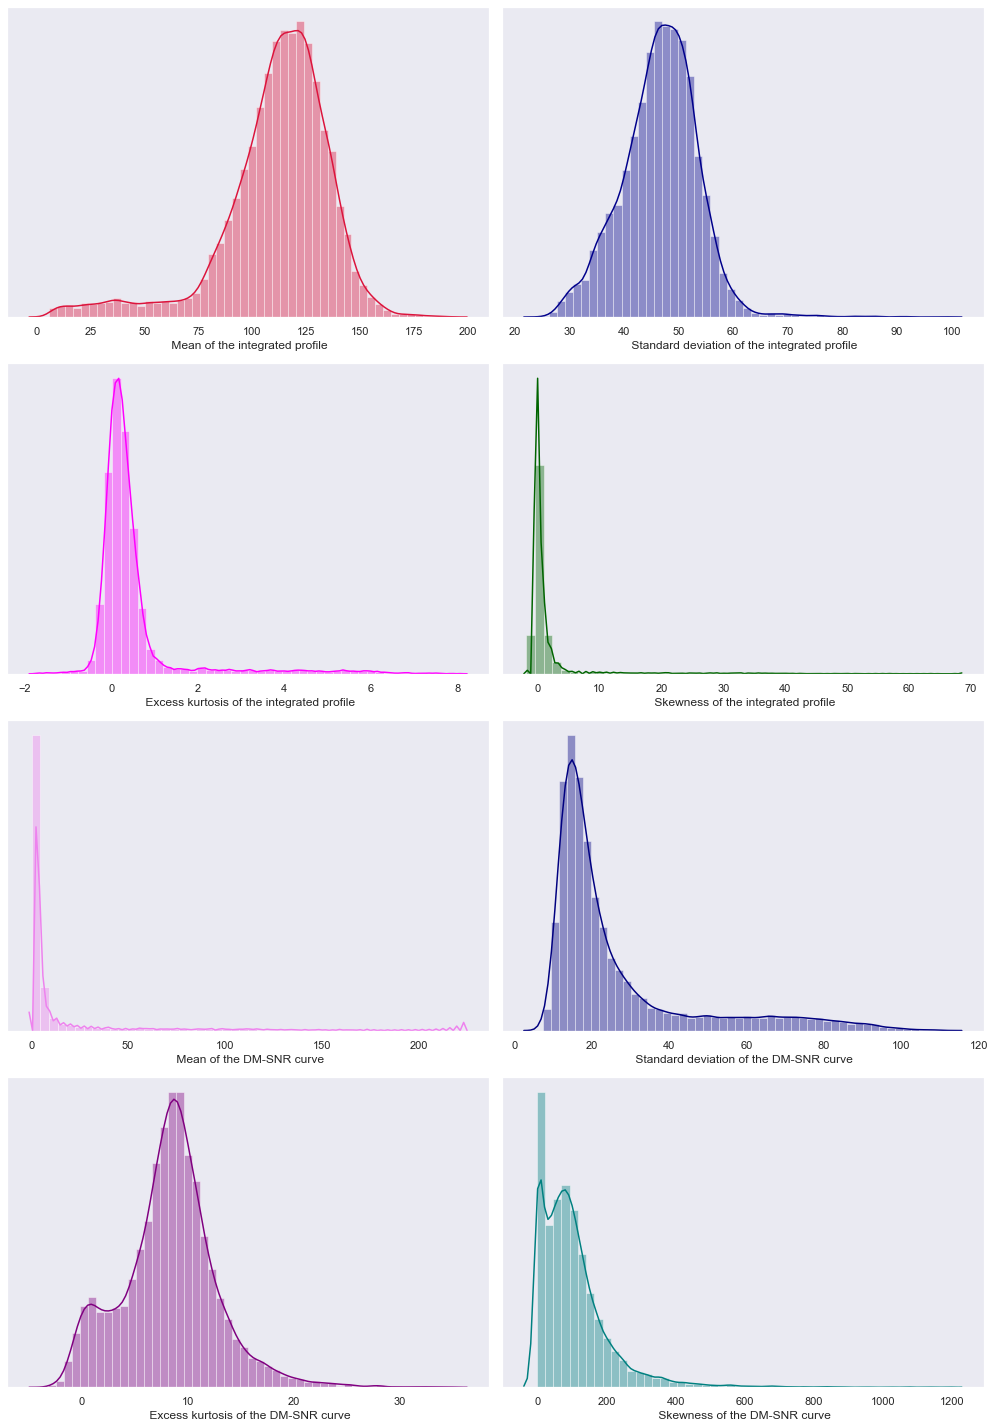

In [3]:
sns.set(style="dark", palette="muted", color_codes=True)
f, axes = plt.subplots(4, 2, figsize=(14, 20), sharex=False)
sns.distplot(train_df[' Mean of the integrated profile'], color='crimson', hist=True,  ax=axes[0, 0])
sns.distplot(train_df[' Standard deviation of the integrated profile'], color='darkblue', hist=True, ax=axes[0, 1])
sns.distplot(train_df[' Excess kurtosis of the integrated profile'], color='magenta', hist=True, ax=axes[1, 0])
sns.distplot(train_df[' Skewness of the integrated profile'], color='darkgreen', hist=True, ax=axes[1, 1])
sns.distplot(train_df[' Mean of the DM-SNR curve'], hist=True, color='violet', ax=axes[2, 0])
sns.distplot(train_df[' Standard deviation of the DM-SNR curve'], color='navy', hist=True, ax=axes[2, 1])
sns.distplot(train_df[' Excess kurtosis of the DM-SNR curve'], color='purple', hist=True, ax=axes[3, 0])
sns.distplot(train_df[' Skewness of the DM-SNR curve'], color='teal', hist=True, ax=axes[3, 1])


plt.setp(axes, yticks=[])
plt.tight_layout()

## Correlation matrix

Text(0.5, 1.0, 'Data correlation matrix')

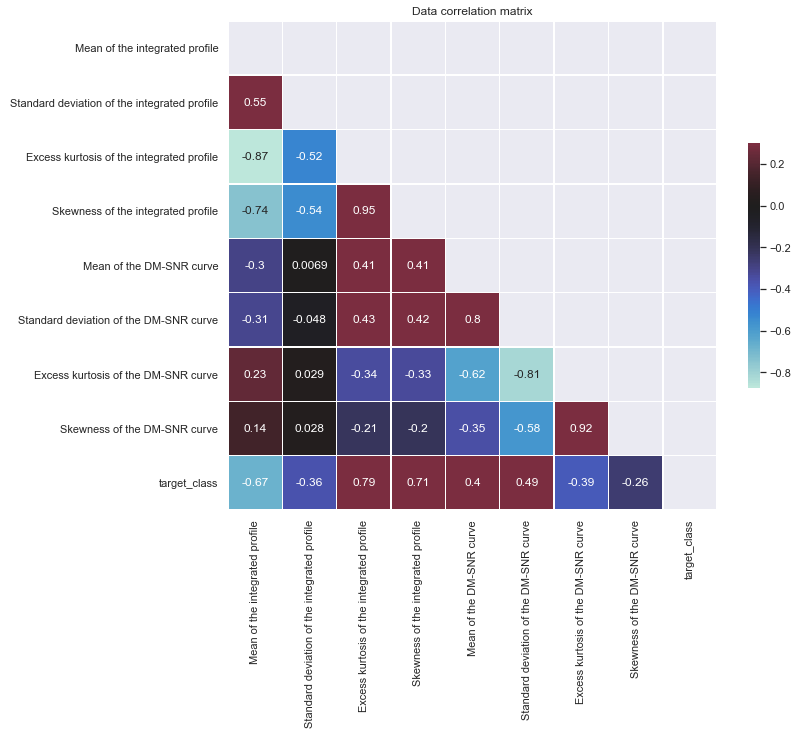

In [4]:
#sns.set(style="white")

corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))



# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Data correlation matrix")

# Scaled data

In [5]:
np.load('./data/X_train_scaled.npy')

array([[-0.1451517 , -0.96285831, -0.02033165, ...,  0.08826633,
         0.29001843,  0.20557759],
       [ 0.93902439, -0.14270839, -0.72317479, ...,  5.13465807,
        -1.75493022, -0.81677137],
       [ 0.79684711, -0.01049546, -0.25427334, ..., -0.08606179,
         0.10781852,  0.06355157],
       ...,
       [-1.02230815, -0.88129502,  0.72135958, ..., -0.19565375,
         0.36923689,  0.32543449],
       [-0.88875669, -0.83768096,  0.76914303, ...,  1.33266741,
        -0.96544694, -0.67549124],
       [ 0.98810232,  1.20951529, -0.94666702, ...,  1.7124552 ,
        -1.03583675, -0.696305  ]])

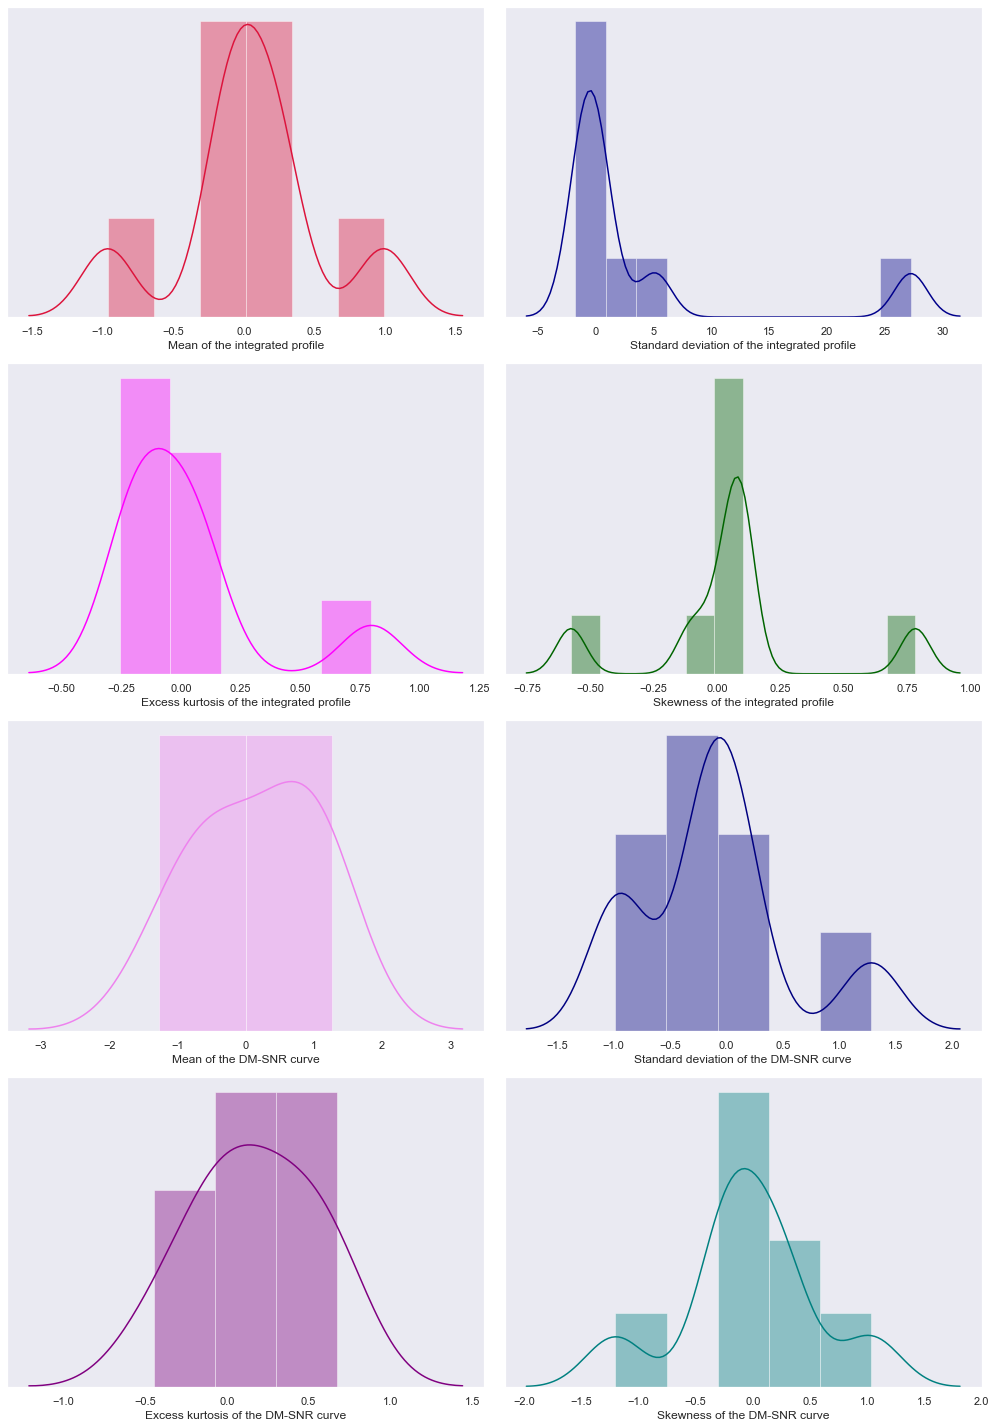

In [6]:
scaled_df = np.load('./data/X_train_scaled.npy')

sns.set(style="dark", palette="muted", color_codes=True)
f, axes = plt.subplots(4, 2, figsize=(14, 20), sharex=False)
sns.distplot(scaled_df[0], axlabel='Mean of the integrated profile', color='crimson', hist=True,  ax=axes[0, 0])
sns.distplot(scaled_df[1], axlabel='Standard deviation of the integrated profile', color='darkblue', hist=True, ax=axes[0, 1])
sns.distplot(scaled_df[2], axlabel='Excess kurtosis of the integrated profile', color='magenta', hist=True, ax=axes[1, 0])
sns.distplot(scaled_df[3], axlabel='Skewness of the integrated profile', color='darkgreen', hist=True, ax=axes[1, 1])
sns.distplot(scaled_df[4], axlabel='Mean of the DM-SNR curve', hist=True, color='violet', ax=axes[2, 0])
sns.distplot(scaled_df[5], axlabel='Standard deviation of the DM-SNR curve', color='navy', hist=True, ax=axes[2, 1])
sns.distplot(scaled_df[6], axlabel='Excess kurtosis of the DM-SNR curve', color='purple', hist=True, ax=axes[3, 0])
sns.distplot(scaled_df[7], axlabel='Skewness of the DM-SNR curve', color='teal', hist=True, ax=axes[3, 1])


plt.setp(axes, yticks=[])
plt.tight_layout()

## Top-10 confusion matrices

In [7]:
abc = pd.read_csv('./results/abc_results.csv')
dt = pd.read_csv('./results/dt_results.csv')
etc = pd.read_csv('./results/etc_results.csv')
knn = pd.read_csv('./results/knn_results.csv')
lr = pd.read_csv('./results/lr_results.csv')
rf = pd.read_csv('./results/rf_results.csv')
svc = pd.read_csv('./results/svc_results.csv')
xgbc = pd.read_csv('./results/xgbc_results.csv')

results = pd.concat([abc, dt, etc, knn, lr, rf, svc, xgbc], ignore_index=True, sort=False).sort_values(by="Cohen's Kappa", ascending=False).reset_index(drop=True)
results[['Algorithm', 'PCA', 'Tuning', 'Scaling', 'Sampling', 'Weighted precision', 'Weighted recall', 'Weighted F1', 'Matthews corrcoefficient', "Cohen's Kappa"]].head(10)

,Algorithm,PCA,Tuning,Scaling,Sampling,Weighted precision,Weighted recall,Weighted F1,Matthews corrcoefficient,Cohen's Kappa
0,Gradient Boosting,False,True,True,smote,0.980401,0.980630,0.980491,0.886,0.886
1,Random Forest,False,True,True,smote,0.980073,0.980257,0.980152,0.884,0.884
2,Logistic Regression,False,True,False,ros,0.979958,0.980257,0.980062,0.883,0.883
3,Logistic Regression,False,True,True,ros,0.979778,0.980071,0.979883,0.882,0.882
4,Logistic Regression,False,False,True,ros,0.979758,0.980071,0.979864,0.882,0.882
5,Logistic Regression,False,False,True,smote,0.979758,0.980071,0.979864,0.882,0.882
6,Random Forest,False,True,True,nm-3,0.979655,0.980071,0.979714,0.881,0.880
7,Logistic Regression,False,True,True,smote,0.979559,0.979885,0.979667,0.881,0.880
8,AdaBoost,False,True,True,smote,0.979671,0.980071,0.979752,0.881,0.880
9,ExtraTreeClassifier,False,True,True,smote,0.979444,0.979698,0.979544,0.880,0.880


In [8]:
results.Parameters[9]

"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 8, 'max_features': None, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': 25, 'verbose': 0, 'warm_start': False}"

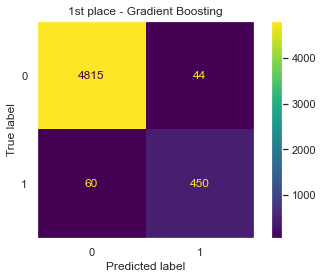

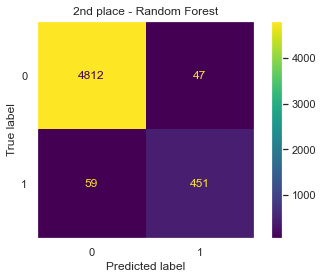

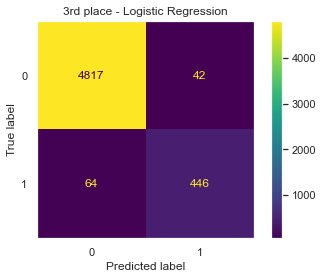

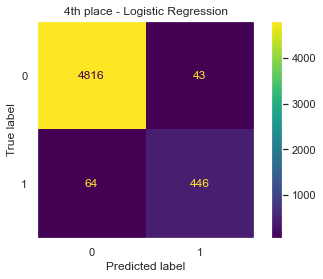

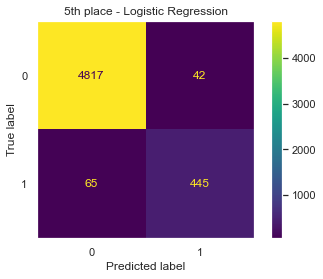

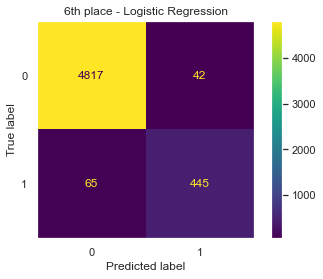

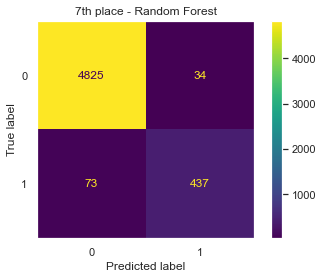

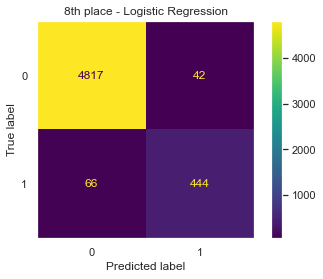

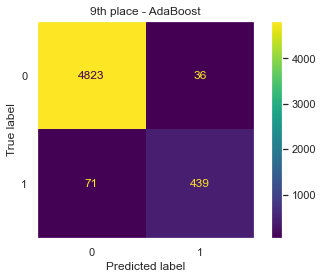

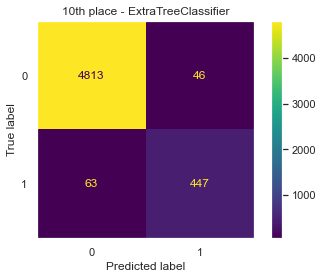

In [9]:
for i in range(0, 10):
    plot_conf_matrix(results.iloc[i]['Parameters'], results.iloc[i]['PCA'], results.iloc[i]['Scaling'], results.iloc[i]['Sampling'], results.iloc[i]['Algorithm'], place=i+1, save=True)